In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
df = pd.read_csv('diabetes.csv')

In [11]:
import seaborn as sns

#### Libs from pytorch



import torch.nn as nn
import torch.nn.functional as F



In [4]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Outcome',axis = 1).values

y = df['Outcome'].values

In [60]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state= 0)

In [61]:
#### creating tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [62]:
### model with pytorch


class AA_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2= 20, out_features =2):
        super().__init__()
        self.f_connected1= nn.Linear(input_features,hidden1)
        self.f_connected2= nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [63]:
### instantiate my ANN_model
torch.manual_seed(20)
model = AA_Model()

In [64]:
model.parameters

<bound method Module.parameters of AA_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [65]:
### backward Progation
# define loss func and aoptimizer

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [68]:
epochs = 500

final_losses =[]
for i in range(epochs):
        i = i +1
        y_pred= model.forward(X_train)
        loss=loss_func(y_pred,y_train)
        final_losses.append(loss)
        if i%10 == 1:
            print("Epochs  numbers: {} and the lsoss : {}".format(i, loss.item()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Epochs  numbers: 1 and the lsoss : 0.3628762662410736
Epochs  numbers: 11 and the lsoss : 0.3577205538749695
Epochs  numbers: 21 and the lsoss : 0.35645097494125366
Epochs  numbers: 31 and the lsoss : 0.3525201082229614
Epochs  numbers: 41 and the lsoss : 0.3493729531764984
Epochs  numbers: 51 and the lsoss : 0.39238831400871277
Epochs  numbers: 61 and the lsoss : 0.3878645598888397
Epochs  numbers: 71 and the lsoss : 0.35813960433006287
Epochs  numbers: 81 and the lsoss : 0.3478778898715973
Epochs  numbers: 91 and the lsoss : 0.35813280940055847
Epochs  numbers: 101 and the lsoss : 0.3822939395904541
Epochs  numbers: 111 and the lsoss : 0.3712691366672516
Epochs  numbers: 121 and the lsoss : 0.33803582191467285
Epochs  numbers: 131 and the lsoss : 0.3353152573108673
Epochs  numbers: 141 and the lsoss : 0.33819887042045593
Epochs  numbers: 151 and the lsoss : 0.38261356949806213
Epochs  numbers: 161 and the lsoss : 0.3812277615070343
Epochs  numbers: 171 and the lsoss : 0.3374270796775

In [72]:
import  matplotlib.pyplot as plt

%matplotlib  inline

Text(0.5, 0, 'Epochs')

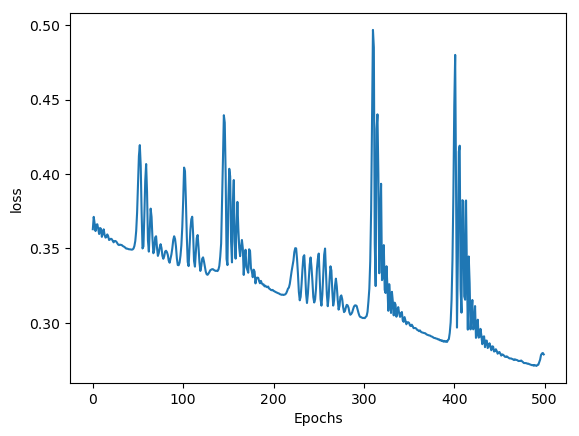

In [73]:
plt.plot(range(epochs), final_losses)

plt.ylabel('loss')
plt.xlabel('Epochs')

In [78]:
#### Predictiom in X_test data

predictions = []

with torch.no_grad():
    for i ,data in enumerate(X_test):
        pred_Y = model(data)
        predictions.append(pred_Y.argmax().item())
        print(pred_Y.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
0
1
1
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [82]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[90, 17],
       [20, 27]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predic Values')

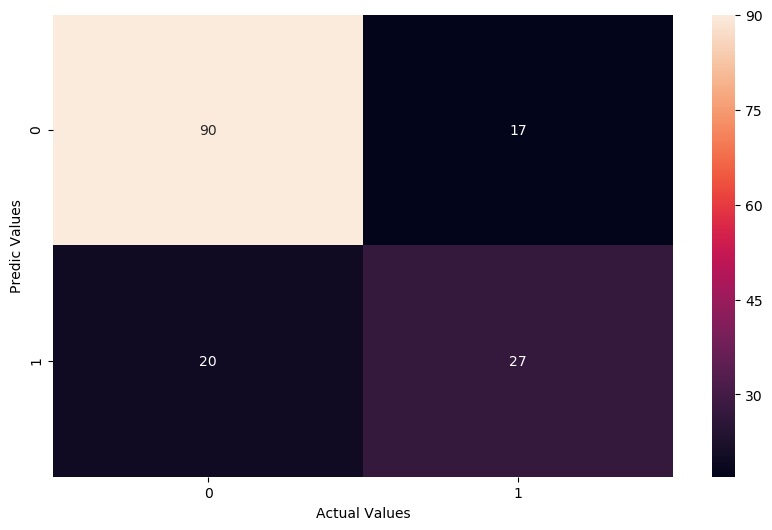

In [83]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predic Values')

In [85]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,predictions)


In [86]:
score

0.7597402597402597

In [89]:
torch.save(model,'diabetes.pt')

In [90]:
model = torch.load('diabetes.pt')

In [91]:
model.eval()

AA_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [92]:
###  New data piont predicted


list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [94]:
lst1 = [6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]


new_data  = torch.tensor(lst1)

In [95]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.7065, 2.1339])
1
